In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer


In [4]:
#SENTIMENT ANALYSIS
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/UScomments.csv",on_bad_lines="skip")
nltk.download("vader_lexicon")
sia = SentimentIntensityAnalyzer()
#print(df["comment_text"])
#print(sia.polarity_scores("MY FAN . attendance")["compound"])

#starting loop for storing all comment's sentiment/polarity value
sentiment_score= []
for comment in df['comment_text']:
    score= sia.polarity_scores(str(comment))['compound']
    sentiment_score.append(score)

sample_data = df[0:50]
#print(sentiment_score)
df['polarity_score']= sentiment_score
print(df.head(6))

/tmp/ipython-input-4118805983.py:2: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/UScomments.csv",on_bad_lines="skip")
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


      video_id                                       comment_text likes  \
0  XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1  XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2  XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3  XpVt6Z1Gjjo                                MY FAN . attendance     3   
4  XpVt6Z1Gjjo                                         trending 😉     3   
5  XpVt6Z1Gjjo                            #1 on trending AYYEEEEE     3   

  replies  polarity_score  
0       0          0.0000  
1       0          0.0000  
2       0          0.0000  
3       0          0.4648  
4       0          0.0000  
5       0          0.0000  


In [5]:
#WORDCLOUD ANALYSIS
filter_pos=(df['polarity_score'] >= 0.8) & (df['polarity_score'] <= 1.0)
df_positive=df[filter_pos]
#df_positive.shape



In [6]:
filter_neg=(df['polarity_score'] >= -1.0) & (df['polarity_score'] <= -0.8)
df_negative=df[filter_neg]
df[filter_neg]
#df_negative.shape

,video_id,comment_text,likes,replies,polarity_score
35,XpVt6Z1Gjjo,"Evan is being a douch Logans getting pissed, L...",0,0,-0.9421
63,XpVt6Z1Gjjo,No one fucking cares. You're a 12 year old. Th...,0,0,-0.9005
113,cLdxuaxaQwc,OK guys i get that the word was once used as a...,0,0,-0.9470
114,cLdxuaxaQwc,pewdiepie had nothing to be sorry about. ever...,0,0,-0.8062
115,cLdxuaxaQwc,I think other YouTube's who are hatting at him...,0,0,-0.9457
...,...,...,...,...,...
691254,qRoVlH1OcI4,I swear that Trump supporters would eat warm d...,0,0,-0.8979
691259,qRoVlH1OcI4,there are many reasons for taking a knee to th...,0,0,-0.9065
691262,qRoVlH1OcI4,it's odd to think how many people keep asking ...,0,0,-0.9538
691263,qRoVlH1OcI4,So when we take a knee for fallen soldiers tha...,0,0,-0.8519


In [7]:
!pip install wordcloud

In [8]:
from wordcloud import WordCloud, STOPWORDS

In [9]:
total_positive_comment=''.join(df_positive["comment_text"])

In [10]:
total_positive_comment[0:1000]

"I love Logan and Jake so much and thay are so amazing and I look up to them so much 😍💋💙👍if you get allot of diss likes do you get on the top comments? lets see diss like this pleaseI love you so much I love to meet you But I live in Israel You really inspire me I really like your channel Keep doing what you do\\nBecause everyone loves it and will be Unique and Pashan will be creative and I hope you will see it byeThis looks like a great video, but after you are done would you be kind enough to check out my new YouTube channel and give me some feedback? Maybe even subscribing? :)Congrats Logan love u so much someday I would love to meet u #1 fan of the logang ❤️Well done I LOVE! You so much :DI am very happy for this man and we need to spread more love. United we stand, divided we fall.And this could in all honestly become a good thing for you. You sit on a platform where you could really educate people especially when so many of your fans seem to think it's okay to be said. Really lea

In [11]:
wordcloud_positive=WordCloud(stopwords=set(STOPWORDS)).generate(total_positive_comment)

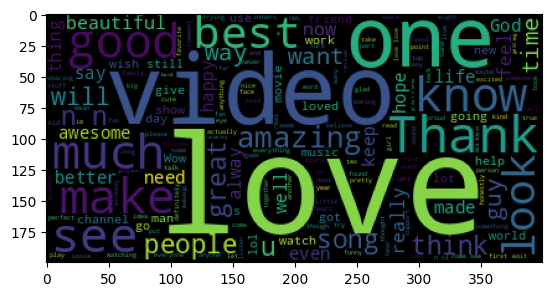

In [12]:
plt.imshow(wordcloud_positive)

In [13]:
total_negative_comment=''.join(df_negative["comment_text"])

In [14]:
wordcloud_negative=WordCloud(stopwords=set(STOPWORDS)).generate(total_negative_comment)

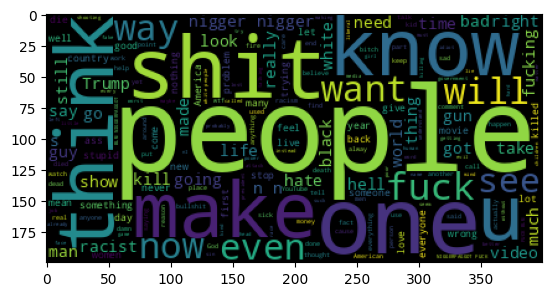

In [15]:
plt.imshow(wordcloud_negative)

In [16]:
# START EMOJI ANALYSIS

In [17]:
!pip install EMOJI==2.14.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 7.5 MB/s eta 0:00:00


In [18]:
import emoji

In [19]:
emoji_info=emoji.emoji_list

In [20]:
df["comment_text"] = df["comment_text"].fillna("")

all_emojis_found=[]
for comment in df["comment_text"]:
  emoji_info=emoji.emoji_list(comment)
  emojis_found= [item["emoji"]for item in emoji_info]
  all_emojis_found.extend(emojis_found)

In [21]:
all_emojis_found[0:10]

['‼️', '‼️', '‼️', '😉', '😭', '👍🏻', '❤️', '😍', '💋', '💙']

In [22]:
from collections import Counter
emojis_count_list_top10=Counter(all_emojis_found).most_common(10)
print(emojis_count_list_top10)

[('😂', 36987), ('😍', 33453), ('❤️', 16911), ('❤', 14167), ('🔥', 8694), ('😭', 8398), ('😘', 5545), ('💖', 5359), ('💕', 5147), ('👍', 4251)]


In [23]:

emoji = [emoji for emoji,count in emojis_count_list_top10]
count = [count for emoji,count in emojis_count_list_top10]

In [24]:
print(emoji)
print(count)

['😂', '😍', '❤️', '❤', '🔥', '😭', '😘', '💖', '💕', '👍']
[36987, 33453, 16911, 14167, 8694, 8398, 5545, 5359, 5147, 4251]


In [25]:
! pip install plotly

In [26]:
import plotly.graph_objs as go
from plotly.offline import iplot
iplot([go.Bar(x= emoji ,y= count)])

In [27]:
import os
files = os.listdir('/content/drive/MyDrive/Colab Notebooks/additional_data')
files

['CA_category_id.json',
 'CAvideos.csv',
 'DE_category_id.json',
 'FR_category_id.json',
 'DEvideos.csv',
 'FRvideos.csv',
 'GB_category_id.json',
 'GBvideos.csv',
 'IN_category_id.json',
 'JP_category_id.json',
 'INvideos.csv',
 'JPvideos.csv',
 'KR_category_id.json',
 'KRvideos.csv',
 'MX_category_id.json',
 'RU_category_id.json',
 'MXvideos.csv',
 'US_category_id.json',
 'RUvideos.csv',
 'USvideos.csv']

In [28]:
file_csv=[ file for file in files if '.csv' in file]
file_csv

['CAvideos.csv',
 'DEvideos.csv',
 'FRvideos.csv',
 'GBvideos.csv',
 'INvideos.csv',
 'JPvideos.csv',
 'KRvideos.csv',
 'MXvideos.csv',
 'RUvideos.csv',
 'USvideos.csv']

In [29]:
file_json=[file for file in files if '.json' in file]
file_json

['CA_category_id.json',
 'DE_category_id.json',
 'FR_category_id.json',
 'GB_category_id.json',
 'IN_category_id.json',
 'JP_category_id.json',
 'KR_category_id.json',
 'MX_category_id.json',
 'RU_category_id.json',
 'US_category_id.json']

In [30]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [31]:
full_df=pd.DataFrame()
path='/content/drive/MyDrive/Colab Notebooks/additional_data'

for file in file_csv:
  current_df=pd.read_csv(path+'/'+file,encoding='Iso-8859-1')
  full_df=pd.concat([full_df,current_df],ignore_index=True)

In [32]:
full_df.shape

(375942, 16)

In [33]:
# now we will extract the raw data for cleaning

In [34]:
full_df.duplicated().sum()

np.int64(36417)

In [35]:
full_df=full_df.drop_duplicates()
full_df.shape

(339525, 16)

In [36]:
full_df[0:100].to_csv(r'C:\Users\SRIJANI\Downloads\Colab Notebooks\Colab Notebooks\additional_data.csv')

In [37]:
full_df[0:100].to_json(r'C:\Users\SRIJANI\Downloads\Colab Notebooks\Colab Notebooks\additional_data.json')

In [38]:
full_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...


In [39]:
full_df['category_id'].unique()

array([10, 23, 24, 25, 22, 26,  1, 28, 20, 17, 29, 15, 19,  2, 27, 43, 30,
       44])

In [40]:
json_df= pd.read_json(r'/content/drive/MyDrive/Colab Notebooks/additional_data/US_category_id.json')


In [41]:
json_df['items'][0]

{'kind': 'youtube#videoCategory',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
 'id': '1',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Film & Animation',
  'assignable': True}}

In [42]:
cat_dict={}

for item in json_df['items'].values:
  cat_dict[int(item['id'])]=item['snippet']['title']


In [43]:
full_df['category_name']=full_df['category_id'].map(cat_dict)
full_df.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,Music
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,Comedy
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,Comedy
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,Music


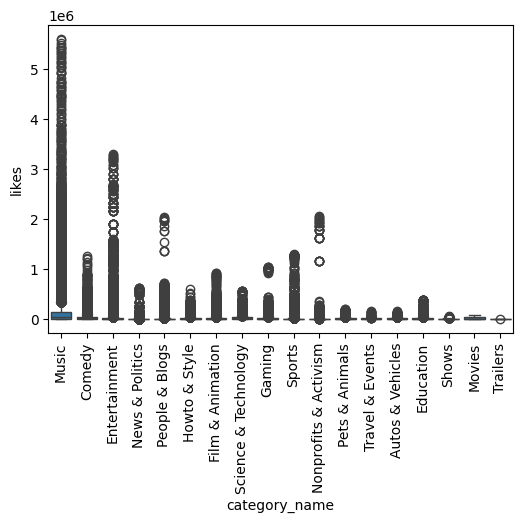

In [70]:
plt.figure(figsize=(6,4))
sns.boxplot(x='category_name', y='likes',data=full_df)
plt.xticks(rotation='vertical')
plt.show()

In [45]:
full_df['like_rate']=(full_df['likes']/full_df['views'])*100
full_df['dislike_rate']=(full_df['dislikes']/full_df['views'])*100
full_df['comment_count_rate']=(full_df['comment_count']/full_df['views'])*100


In [46]:
full_df.shape

(339525, 20)

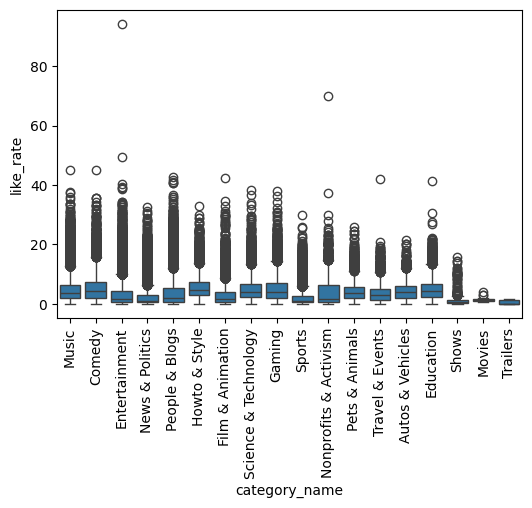

In [71]:
plt.figure(figsize=(6,4))
sns.boxplot(x='category_name', y='like_rate',data=full_df)
plt.xticks(rotation='vertical')
plt.show()

In [48]:
full_df[['views','likes','dislikes']].corr()

,views,likes,dislikes
views,1.000000,0.779531,0.405428
likes,0.779531,1.000000,0.451809
dislikes,0.405428,0.451809,1.000000


# ANALYZE TRENDING VIDEO OF YOUTUBE

In [49]:
full_df['channel_title'].value_counts().head()

,count
channel_title,
The Late Show with Stephen Colbert,710
WWE,643
Late Night with Seth Meyers,592
TheEllenShow,555
Jimmy Kimmel Live,528


In [50]:
cdf =full_df.groupby(['channel_title']).size().sort_values(ascending=False).reset_index()

cdf = cdf.rename(columns={0:'total_videos'})
cdf

,channel_title,total_videos
0,The Late Show with Stephen Colbert,710
1,WWE,643
2,Late Night with Seth Meyers,592
3,TheEllenShow,555
4,Jimmy Kimmel Live,528
...,...,...
37819,Tesoros Enterrados,1
37820,Anton Neverov,1
37821,Thalia 444,1
37822,Thaitv6 Official,1


In [51]:
import plotly.express as px

In [73]:
px.bar(data_frame=cdf[0:20], x="channel_title", y="total_videos")

# punctuation in title analysis


In [53]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [54]:
full_df['title'][0]

'Eminem - Walk On Water (Audio) ft. BeyoncÃ©'

In [55]:
len([char for char in full_df['title'][0] if char in string.punctuation])

4

In [56]:
def punc_count(text):
  return len([char for char in text if char in string.punctuation])


In [57]:
sample = full_df[0:100]
sample

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,like_rate,dislike_rate,comment_count_rate
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,Music,4.589104,0.253051,0.733639
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,Comedy,12.594873,0.166363,1.284185
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,Comedy,4.575843,0.167292,0.256342
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment,6.309630,0.094903,0.835851
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,Music,4.874563,0.062887,0.253752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,zxuvr9tN924,17.14.11,éè¯å¿æ° å®æ´ç âå°æ±äºæâäº®ç...,æ±èå«è§å®æ¹é¢éChina JiangsuTV Offici...,24,2017-11-11T16:00:04.000Z,"æ±èå«è§|""éè¯å¿æ°""|""å§æ¯å®""|""å­é...",150974,220,65,201,https://i.ytimg.com/vi/zxuvr9tN924/default.jpg,False,False,False,å ³æ³¨ãå¾®ä¿¡å ¬ä¼å·ãææ°ç¬å®¶å å®¹æ...,Entertainment,0.145720,0.043054,0.133136
96,dKBThyjj0J0,17.14.11,'Helping People' Sneak Peek Ep. 805 | The Walk...,amc,24,2017-11-13T03:00:01.000Z,"The Walking Dead|""episode 805""|""episode 5""|""Th...",70448,1538,25,315,https://i.ytimg.com/vi/dKBThyjj0J0/default.jpg,False,False,False,Negan and Father Gabriel remain trapped togeth...,Entertainment,2.183171,0.035487,0.447138
97,pQgPR2V6924,17.14.11,ãæèä¸çå¨å ±ãç¾åªçé ¸å·æ®ãå...,æèçä¸çå¨å ± Sisy's World News,25,2017-11-12T07:09:51.000Z,"é³æè|""æèä¸çå¨å ±""|""æèä¸çè²...",135620,379,86,449,https://i.ytimg.com/vi/pQgPR2V6924/default.jpg,False,False,False,ãä¸­å¤©çå¤¢æ³é©ç«ãæ´å¤å½±é³âhttp...,News & Politics,0.279457,0.063412,0.331072
98,lHcXhBojpeQ,17.14.11,ä¸å±TVBè¦å¸ï¼ææ£10å¹´éæ¢ ç«¹é¦¬é«®å¦...,ææç¾æç,22,2017-11-12T12:49:50.000Z,[none],88061,47,58,17,https://i.ytimg.com/vi/lHcXhBojpeQ/default.jpg,False,False,False,NaN,People & Blogs,0.053372,0.065863,0.019305


In [66]:
sample['count_punctuation']=full_df['title'].apply(punc_count)

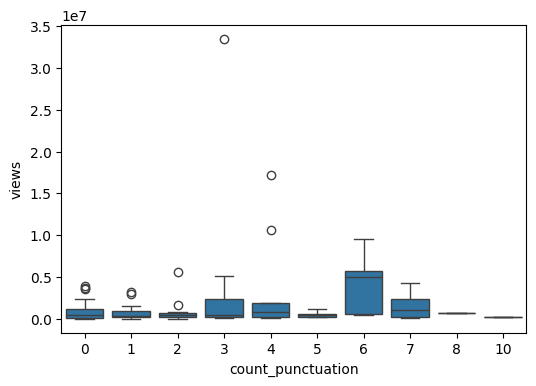

In [74]:
plt.figure(figsize=(6,4))
sns.boxplot(x='count_punctuation',y='views', data=sample)
plt.show()